In [ ]:
def kmeans(X,k=5,mit=10):
  if isinstance(X,pd.DataFrame):X = X.values
  idx=np.random.choice(len(X),k,replace=False)
  centroids=X[idx,:]
  p=np.argmin(distance.cdist(X,centroids, 'euclidean'),axis=1)
  for _ in range(mit):
    centroids=np.vstack([X[p==i,:].mean(axis=0) for i in range(k)])
    tmp=np.argmin(distance.cdist(X,centroids,'euclidean'),axis=1)
    p=tmp
  return p

In [ ]:
import numpy as np
import pandas as pd
from scipy.spatial import distance
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from PIL import Image
colourImg = Image.open("/content/drive/My Drive/picroh.PNG")
colourPixels = colourImg.convert("RGB")
colourArray = np.array(colourPixels.getdata())

df = pd.DataFrame(colourArray, columns=["red","green","blue"])

In [ ]:

X=df.values
sc=StandardScaler()
sc.fit(X)
X=sc.transform(X)
X

array([[0.8816461 , 1.0594966 , 1.23093431],
       [0.76129067, 0.95580609, 1.11452333],
       [0.61686415, 0.83137748, 0.97483014],
       ...,
       [0.42429547, 0.66547267, 0.78857256],
       [0.61686415, 0.83137748, 0.97483014],
       [0.8816461 , 1.0594966 , 1.23093431]])

In [ ]:
p = kmeans(X,5,10)

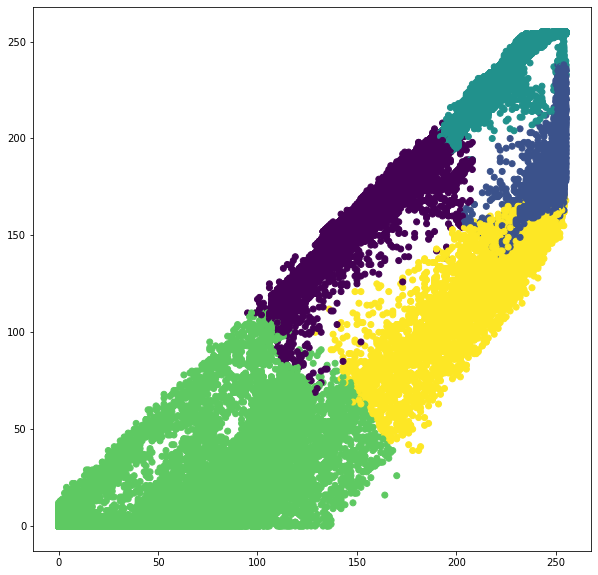

In [ ]:
X=sc.inverse_transform(X)
plt.figure(figsize=(10,10))
plt.scatter(X[:,0],X[:,1],c=p)
plt.show()